In [1]:
%pip install opencv-python
%pip install keras
%pip install tensorflow
%pip install visualkeras
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached visualkeras-0.0.2-py3-none-any.whl (12 kB)
  Using cached aggdraw-1.3.16.tar.gz (260 kB)


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for aggdraw: filename=aggdraw-1.3.16-cp311-cp311-macosx_11_0_arm64.whl size=64644 sha256=7a578f60c61dd01bf0179f96e05ee375f5a0a30e68e8f3a58b5f75f5b9bfc21a
  Stored in directory: /Users/vivibanh/Library/Caches/pip/wheels/c5/3a/15/88c5469dac5c9ad9e90cd64f603040a9f0bad4f3cebdd096f3
Successfully built aggdraw
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Strips & imports all the image file paths image array
def image_extractor(root_dir,image_array,image_labels,label,categories):
    C = []
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.jpg'):
                jpg_file_path = os.path.join(subdir, file)
                image_array.append(jpg_file_path)
                image_labels.append(label)
                

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

directory = '/Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square'
subDirectories = ['Boots','Sandals','Shoes','Slippers']
categories = []
image_array=[]
image_labels=[]

for category in subDirectories:
    path = os.path.join(directory,category) #Path to a certain directory
    label = os.path.basename(path)
    print("Label Part 1:",label)
    for category1 in os.listdir(path):
        subpath = os.path.join(path,category1)
        sublabel = os.path.basename(subpath)+" "+label
        print ("Label:",sublabel)
        categories.append(sublabel)
        image_extractor(subpath,image_array,image_labels,sublabel,categories)
        print("1 ",subpath)
    
print(image_array[0])
print(image_labels[0])
print("Images Length:",len(image_array))
print("Labels Length:",len(image_labels))
print(categories)

Label Part 1: Boots
Label: Prewalker Boots Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Prewalker Boots
Label: .DS_Store Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/.DS_Store
Label: Mid-Calf Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Mid-Calf
Label: Over the Knee Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Over the Knee
Label: Ankle Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Ankle
Label: Knee High Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Knee High
Labe

In [4]:
import pandas as pd
import numpy as np 
import pandas as pd
import os
from pathlib import Path
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
import matplotlib.pyplot as plt

# load label file
filepaths = pd.Series(image_array, name='ImagePaths').astype(str)
Labels = pd.Series(image_labels, name='Labels').astype(str)

img_df = pd.merge(filepaths, Labels, right_index = True, left_index = True)
img_df.head()

,ImagePaths,Labels
0,/Users/vivibanh/Downloads/kaggle/input/large-s...,Prewalker Boots Boots
1,/Users/vivibanh/Downloads/kaggle/input/large-s...,Prewalker Boots Boots
2,/Users/vivibanh/Downloads/kaggle/input/large-s...,Mid-Calf Boots
3,/Users/vivibanh/Downloads/kaggle/input/large-s...,Mid-Calf Boots
4,/Users/vivibanh/Downloads/kaggle/input/large-s...,Mid-Calf Boots


In [5]:
# check labels
img_df = img_df.groupby('Labels').filter(lambda x : len(x)>=10)
img_df['Labels'].value_counts(ascending=True)

Slipper Heels Slippers                  10
Boot Slippers                           14
Athletic Sandals                        14
Crib Shoes Shoes                        23
Over the Knee Boots                     49
Heel Sandals                           126
Prewalker Shoes                        249
Firstwalker Shoes                      369
Boat Shoes Shoes                       629
Slipper Flats Slippers                1259
Clogs and Mules Shoes                 1427
Oxfords Shoes                         2044
Knee High Boots                       2202
Loafers Shoes                         2875
Flats Shoes                           3994
Mid-Calf Boots                        4726
Flat Sandals                          5601
Heels Shoes                           5739
Ankle Boots                           5855
Sneakers and Athletic Shoes Shoes    12859
Name: Labels, dtype: int64

In [6]:
# show label information
img_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50064 entries, 2 to 50065
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ImagePaths  50064 non-null  object
 1   Labels      50064 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [7]:
# Define the image size you want for the model input
img_height = 224
img_width = 224
# Training batch size
batch_size = 32

In [8]:
# Split the DataFrame into train, test and validation sets
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

x_train, x_test = train_test_split(img_df, test_size=1 - train_ratio, stratify=img_df['Labels'])
x_val, x_test = train_test_split(x_test, test_size=test_ratio/(test_ratio + validation_ratio),stratify=x_test['Labels']) 

print(f'Shape of Training Data : ',x_train.shape)
print(f'Shape of Testing Data : ',x_test.shape)
print(f'Shape of Validation Data : ',x_val.shape)
x_test = x_test.copy()

Shape of Training Data :  (35044, 2)
Shape of Testing Data :  (7510, 2)
Shape of Validation Data :  (7510, 2)


In [9]:
# Create ImageDataGenerator for data augmentation and normalization
img_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
img_size=(224, 224)      

# Flow from DataFrame for training data
x_train = img_datagen.flow_from_dataframe(
    dataframe = x_train, 
    x_col='ImagePaths', 
    y_col='Labels', 
    target_size=img_size, 
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,seed=42
)

# Flow from DataFrame for test data
x_test = img_datagen.flow_from_dataframe(
    dataframe = x_test, 
    x_col='ImagePaths', 
    y_col='Labels', 
    target_size=img_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,seed=42
)

# Flow from DataFrame for validation data
x_val = img_datagen.flow_from_dataframe(
    dataframe = x_val, 
    x_col='ImagePaths', 
    y_col='Labels', 
    target_size=img_size, 
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,seed=42
)

# Check the classes and class indices
print("Classes: ", x_train.class_indices)

Found 35044 validated image filenames belonging to 20 classes.
Found 7510 validated image filenames belonging to 20 classes.
Found 7510 validated image filenames belonging to 20 classes.
Classes:  {'Ankle Boots': 0, 'Athletic Sandals': 1, 'Boat Shoes Shoes': 2, 'Boot Slippers': 3, 'Clogs and Mules Shoes': 4, 'Crib Shoes Shoes': 5, 'Firstwalker Shoes': 6, 'Flat Sandals': 7, 'Flats Shoes': 8, 'Heel Sandals': 9, 'Heels Shoes': 10, 'Knee High Boots': 11, 'Loafers Shoes': 12, 'Mid-Calf Boots': 13, 'Over the Knee Boots': 14, 'Oxfords Shoes': 15, 'Prewalker Shoes': 16, 'Slipper Flats Slippers': 17, 'Slipper Heels Slippers': 18, 'Sneakers and Athletic Shoes Shoes': 19}


In [10]:
# get classes
class_names = list(x_train.class_indices.keys())
print(class_names)

['Ankle Boots', 'Athletic Sandals', 'Boat Shoes Shoes', 'Boot Slippers', 'Clogs and Mules Shoes', 'Crib Shoes Shoes', 'Firstwalker Shoes', 'Flat Sandals', 'Flats Shoes', 'Heel Sandals', 'Heels Shoes', 'Knee High Boots', 'Loafers Shoes', 'Mid-Calf Boots', 'Over the Knee Boots', 'Oxfords Shoes', 'Prewalker Shoes', 'Slipper Flats Slippers', 'Slipper Heels Slippers', 'Sneakers and Athletic Shoes Shoes']


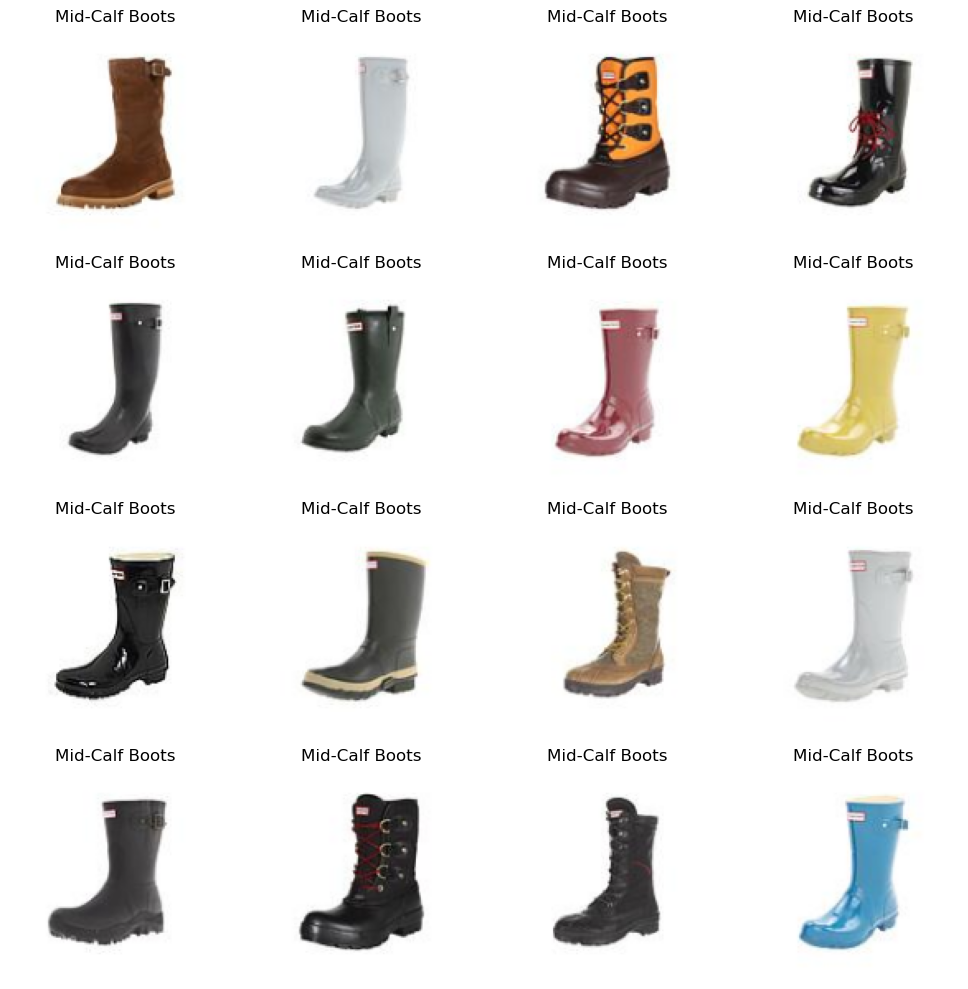

In [11]:
# Sample function to read and resize images using OpenCV
def read_and_resize_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)
    return image

# Function to plot images with their labels
def plot_images_with_labels(data_df, num_rows=4, num_cols=4):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            img_path = data_df.iloc[index]['ImagePaths']
            label = data_df.iloc[index]['Labels']
            image = read_and_resize_image(img_path, (128, 128))
            axes[i, j].imshow(image)
            axes[i, j].set_title(label)
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
    
plot_images_with_labels(img_df.head(16))

In [12]:
model = keras.Sequential([

    # First Convolutional Block
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                 input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Classifier Head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(740, activation="relu"),
    tf.keras.layers.Dense(20, activation="softmax"),
])

model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [13]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

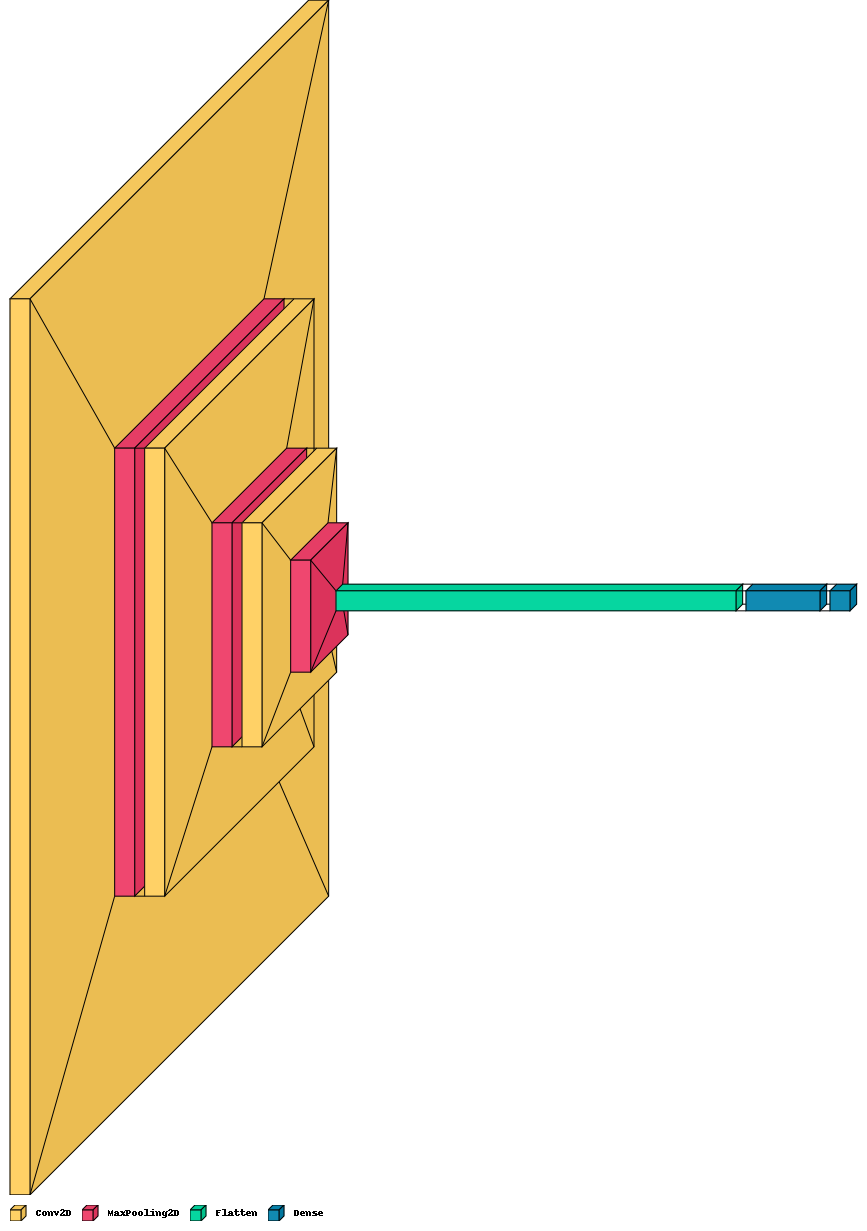

In [14]:
import visualkeras
visualkeras.layered_view(model, legend=True) 

In [15]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
model_fit = model.fit(x_train,
                      validation_data = x_val, 
                      epochs = 10, callbacks=Callback)


Epoch 1/10
1096/1096 [==============================] - 654s 596ms/step - loss: 0.8413 - accuracy: 0.7362 - val_loss: 0.6344 - val_accuracy: 0.7975
Epoch 2/10
1096/1096 [==============================] - 637s 581ms/step - loss: 0.4688 - accuracy: 0.8393 - val_loss: 0.5164 - val_accuracy: 0.8312
Epoch 3/10
1096/1096 [==============================] - 633s 577ms/step - loss: 0.2903 - accuracy: 0.8955 - val_loss: 0.5559 - val_accuracy: 0.8321
Epoch 4/10
1096/1096 [==============================] - 625s 571ms/step - loss: 0.1436 - accuracy: 0.9474 - val_loss: 0.7822 - val_accuracy: 0.8352
Epoch 5/10
1096/1096 [==============================] - 613s 560ms/step - loss: 0.0947 - accuracy: 0.9669 - val_loss: 0.8723 - val_accuracy: 0.8290
Epoch 6/10
1096/1096 [==============================] - 616s 562ms/step - loss: 0.0635 - accuracy: 0.9782 - val_loss: 0.9956 - val_accuracy: 0.8265
Epoch 7/10
1096/1096 [==============================] - 628s 573ms/step - loss: 0.0443 - accuracy: 0.9846 - val_

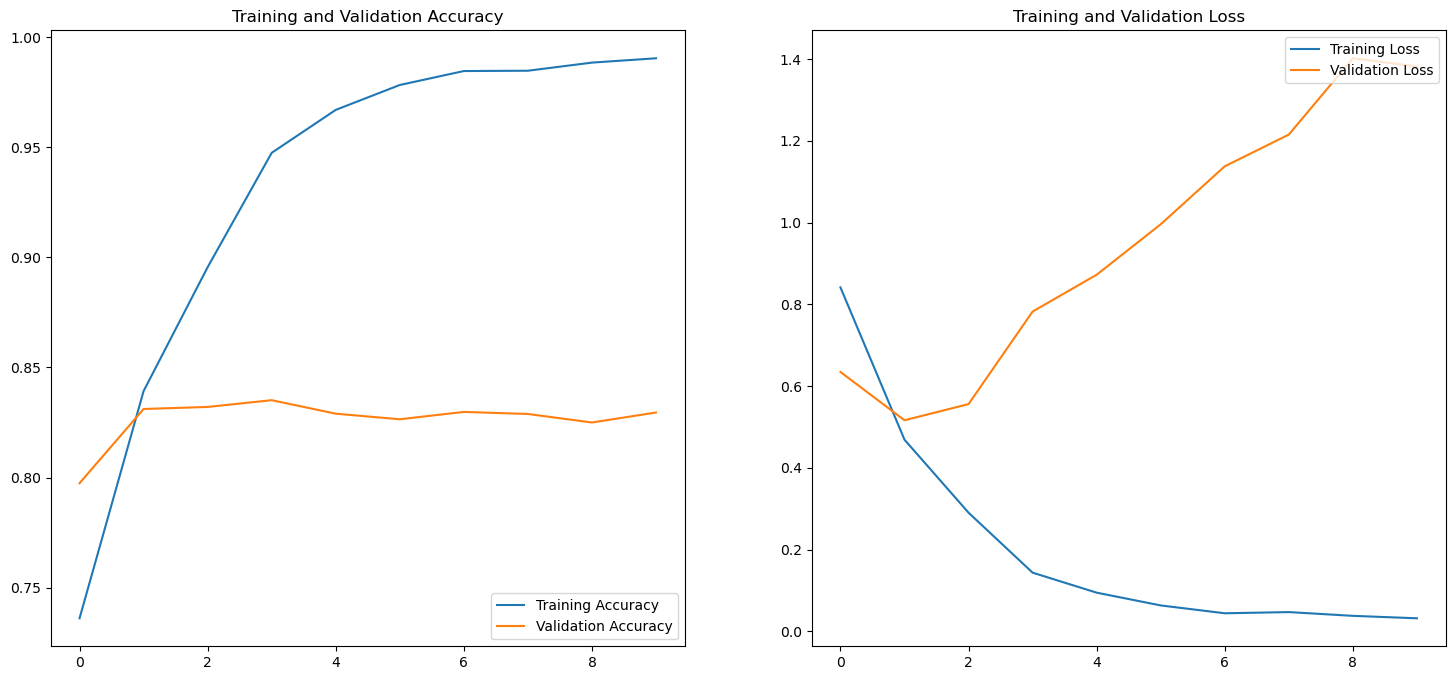

In [16]:
# Visualize training results
epochs = 10
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Dropout

In [17]:
dropout_model = keras.Sequential([

    # First Convolutional Block
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                 input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),
    
    # Add 20% dropout
    tf.keras.layers.Dropout(0.2),

    # Classifier Head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(740, activation="relu"),
    tf.keras.layers.Dense(20, activation="softmax"),
])

dropout_model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

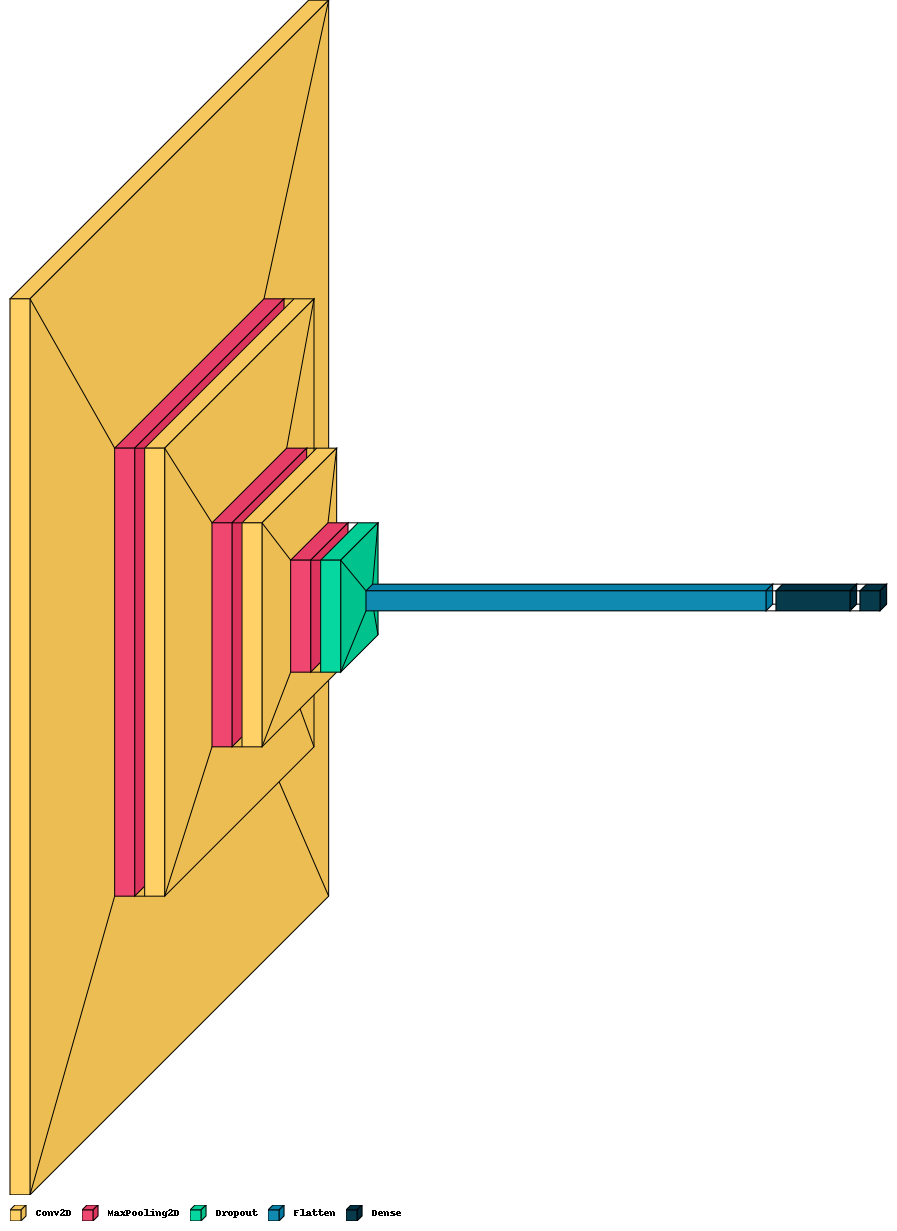

In [18]:
# schematic CNN withdropout
visualkeras.layered_view(dropout_model, legend=True) 

In [ ]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
dropout_model_fit = dropout_model.fit(x_train,
                      validation_data = x_val, 
                      epochs = 10, callbacks=Callback)


Epoch 1/10
1096/1096 [==============================] - 651s 593ms/step - loss: 0.8494 - accuracy: 0.7409 - val_loss: 0.6186 - val_accuracy: 0.8055
Epoch 2/10
 338/1096 [========>.....................] - ETA: 7:52 - loss: 0.4835 - accuracy: 0.8364

In [ ]:
# Visualize training results
epochs = 10
acc = dropout_model_fit.history['accuracy']
val_acc = dropout_model_fit.history['val_accuracy']

loss = dropout_model_fit.history['loss']
val_loss = dropout_model_fit.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with 20% dropout')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with 20% dropout')
plt.show()

In [ ]:
# Evaluate models
test_accuracy = model.evaluate(x_test)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

In [ ]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

In [ ]:
# Make predictions
print("Prediction(0)",predictions[0])
print("Prediction(1)",np.argmax(predictions[0]))
print("Prediction(2)",categories[np.argmax(predictions[0])])
print("")


# Load the image and preprocess it
image_path = '/Users/vivibanh/Downloads/test boots.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = cv2.resize(image, (128, 128))  # Resize the image to match the input size of the model
image = image / 255.0  # Normalize the pixel values to be in the range [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Make prediction using the trained model
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(image)

# Get the predicted class label and probability
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = categories[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

# Display the results
print("Predicted Class Label:", predicted_class_label)
print("Predicted Probability:", predicted_probability)


In [ ]:
#Model 2 with more layers
model2 = keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),
    
    # Adding more Convolutional layers
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),
    
    # Classifier Head
    tf.keras.layers.Flatten(),
    
    # Adding more Dense layers
    tf.keras.layers.Dense(740, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    
    tf.keras.layers.Dense(20, activation="softmax"),
])

model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])
